In [2]:
import plotastic as plst
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# Set Plot Style
plst.set_style("paper")
plst.set_palette("hls", verbose=True)

#! You chose this color palette: ['#db5f57', '#dbc257', '#91db57', '#57db80', '#57d3db', '#5770db', '#a157db', '#db57b2']


['#db5f57',
 '#dbc257',
 '#91db57',
 '#57db80',
 '#57d3db',
 '#5770db',
 '#a157db',
 '#db57b2']

# Example Analysis: Dataset "attention"

**Raw Data:** https://github.com/mwaskom/seaborn-data
  
**Original Source:** https://psych252.github.io/

In [4]:
DF = sns.load_dataset("attention")
DF.head()

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


In [5]:
dims = dict(
    y="score",
    x="solutions",
    # hue="subject",
    # hue="solutions",
    col="attention",  # Subjects
)

DA5 = plst.DataAnalysis(DF, dims, subject="subject", verbose=False)

In [6]:
DA5.check_normality()  # -> normal

/Users/martinkuric/_REPOS/plotastic/src/plotastic/dimensions/dataframetool.py:892: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, df in self.data.groupby(self.factors_all_without_x):


W      pval  normal   n
attention solutions                                
divided   1          0.887173  0.157554    True  10
          2          0.889694  0.168237    True  10
          3          0.891654  0.176996    True  10
focused   1          0.873746  0.110511    True  10
          2          0.887173  0.157554    True  10
          3          0.916453  0.328320    True  10

In [7]:
DA5.check_sphericity()  # -> spheric

/Users/martinkuric/_REPOS/plotastic/src/plotastic/dimensions/dataframetool.py:892: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, df in self.data.groupby(self.factors_all_without_x):


,,spher,W,chi2,dof,pval,group count,n per group
attention,,,,,,,,
divided,0,True,0.702751,2.822022,2,0.243897,3,"[10, 10, 10]"
focused,0,True,0.612371,3.923333,2,0.140624,3,"[10, 10, 10]"


In [8]:
DA5.omnibus_rm_anova()

Source         SS  DF         MS          F     p-unc stars  \
attention                                                                     
divided   0  solutions  29.216667   2  14.608333  11.626382  0.000573   ***   
          1      Error  22.616667  18   1.256481        NaN       NaN   NaN   
focused   0  solutions   0.600000   2   0.300000   0.322709  0.728288    ns   
          1      Error  16.733333  18   0.929630        NaN       NaN   NaN   

                  ng2       eps  
attention                        
divided   0  0.406681  0.770862  
          1       NaN       NaN  
focused   0  0.014706  0.720654  
          1       NaN       NaN

In [9]:
DA5.test_pairwise(paired=True)

A  B  mean(A)    std(A)  mean(B)    std(B)  Paired  \
attention Contrast                                                        
divided   solutions  1  2     4.00  1.414214     4.95  1.257201    True   
          solutions  1  3     4.00  1.414214     6.40  1.074968    True   
          solutions  2  3     4.95  1.257201     6.40  1.074968    True   
focused   solutions  1  2     6.70  1.059350     7.00  1.414214    True   
          solutions  1  3     6.70  1.059350     6.70  1.159502    True   
          solutions  2  3     7.00  1.414214     6.70  1.159502    True   

                     Parametric         T  dof alternative     p-unc    BF10  \
attention Contrast                                                             
divided   solutions        True -2.689996  9.0   two-sided  0.024797   3.022   
          solutions        True -4.000000  9.0   two-sided  0.003110  15.984   
          solutions        True -2.794843  9.0   two-sided  0.020888   3.456   
focused   solutions        True -1.000000  9.0   two-sided  0.343436   0.465   
          solutions        True  0.000000  9.0   two-sided  1.000000   0.309   
          solutions        True  0.557086  9.0   two-sided  0.591051   0.352   

                       hedges **p-unc    Sign.   pairs cross  
attention Contrast                                            
divided   solutions -0.680008       *  signif.  (1, 2)     x  
          solutions -1.829949      **  signif.  (1, 3)     x  
          solutions -1.187317       *  signif.  (2, 3)     x  
focused   solutions -0.229961      ns    False  (1, 2)     x  
          solutions  0.000000      ns    False  (1, 3)     x  
          solutions  0.222190      ns    False  (2, 3)     x

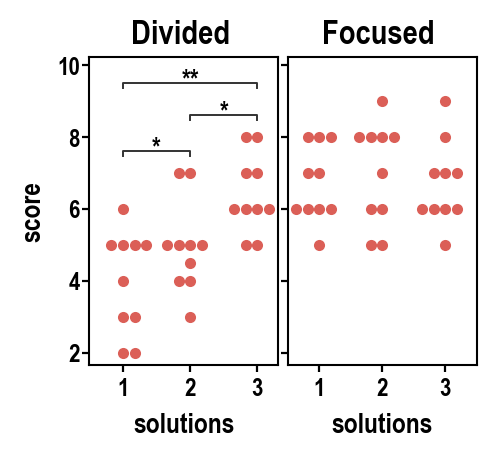

In [10]:
DA5.subplots(figsize=(2.5, 2)).fillaxes(
    kind="swarm",
    dodge=True,
    size=4,
).annotate_pairwise()
plt.savefig("attention1.png", dpi=300, bbox_inches="tight")